# 5 (b - d)

In [61]:
import util
import numpy as np
import matplotlib.pyplot as plt

In [62]:
np.seterr(all='raise')
factor = 2.0

In [63]:
class LinearModel(object):
    """Base class for linear models."""

    def __init__(self, theta=None):
        """
        Args: 
            theta: Weights vector for the model.
        """
        self.theta = theta

    def fit(self, X, y):
        """Run solver to fit linear model. You have to update the value of
        self.theta using the normal equations.

        Args:
            X: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***
        y_new = np.expand_dims(y, axis=1)
        self.theta = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y_new))
        
        # *** END CODE HERE ***

    def create_poly(self, k, X):
        """
        Generates a polynomial feature map using the data x.
        The polynomial map should have powers from 0 to k
        Output should be a numpy array whose shape is (n_examples, k+1)

        Args:
            X: Training example inputs. Shape (n_examples, 2).
        """
        # *** START CODE HERE ***
        x = X[:,1]
        return np.vander(x,k+1,increasing=True)
        # *** END CODE HERE ***

    def create_sin(self, k, X):
        """
        Generates a sin with polynomial featuremap to the data x.
        Output should be a numpy array whose shape is (n_examples, k+2)

        Args:
            X: Training example inputs. Shape (n_examples, 2).
        """
        # *** START CODE HERE ***
        sin_x=np.sin(X[:,1])
        sin_x=np.expand_dims(sin_x, axis=1)
        x = X[:,1]
        x = np.vander(x,k+1,increasing=True)
        x = np.hstack([x,sin_x])
        return x
        # *** END CODE HERE ***

    def predict(self, X):
        """
        Make a prediction given new inputs x.
        Returns the numpy array of the predictions.

        Args:
            X: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """
        # *** START CODE HERE ***
        return (X.dot(self.theta))
        # *** END CODE HERE ***

In [64]:
def run_exp(train_path, sine=False, ks=[1, 2, 3, 5, 10, 20], filename='plot.png'):
    
    train_x,train_y=util.load_dataset(train_path,add_intercept=True)
    plot_x = np.ones([1000, 2])
    plot_x[:, 1] = np.linspace(-factor*np.pi, factor*np.pi, 1000)
    plt.figure()
    plt.scatter(train_x[:, 1], train_y)

    for k in ks:
        '''
        Our objective is to train models and perform predictions on plot_x data
        '''
        # *** START CODE HERE ***
        if(sine):
            lmod = LinearModel()
            train_phi = lmod.create_sin(k,train_x)
            plot_phi = lmod.create_sin(k,plot_x)
            lmod.fit(train_phi,train_y)
            plot_y = lmod.predict(plot_phi)
        else:
            lmod = LinearModel()
            train_phi = lmod.create_poly(k,train_x)
            plot_phi = lmod.create_poly(k,plot_x)
            lmod.fit(train_phi,train_y)
            plot_y = lmod.predict(plot_phi)
        # *** END CODE HERE ***
        '''
        Here plot_y are the predictions of the linear model on the plot_x data
        '''
        plt.ylim(-2, 2)
        plt.plot(plot_x[:, 1], plot_y, label='k=%d' % k)

    plt.legend()
    plt.savefig(filename)
    plt.show()


In [68]:
def main(train_path, small_path, eval_path):
    '''
    Run all expetriments
    '''
    # *** START CODE HERE ***
    run_exp(train_path,sine=True)
    # *** END CODE HERE ***

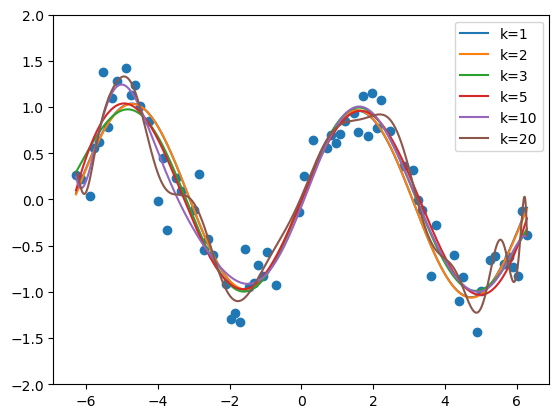

In [69]:
if __name__ == '__main__':
    main(train_path='train.csv',
        small_path='small.csv',
        eval_path='test.csv')
